In [1]:
%matplotlib widget
#%matplotlib inline

In [2]:
# use standard rayoptics environment
from rayoptics.environment import *

import ipywidgets as widgets

In [3]:
import rayoptics.seq.twoconicmirrors as tcm

def apply_conics(opt_model, fct, parax_model):
    cc_m1, cc_m2 = fct(parax_model)
    opt_model.seq_model.ifcs[1].profile.cc = cc_m1
    opt_model.seq_model.ifcs[2].profile.cc = cc_m2
    opt_model.update_model()

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

# Create a new model

In [6]:
app.model = OpticalModel()
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## Define first order aperture and field for system

In [7]:
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=10.)
osp.field_of_view = FieldSpec(osp, key=['image', 'height'], flds=[0., 0.5])

## Define interface and gap data for the sequential model

In [8]:
sm.gaps[0].thi=1e10

In [9]:
opm.add_mirror(lbl='M1', profile=Conic, c=-0.01, t=-33.)
opm.add_mirror(lbl='M2', profile=Conic, c=-0.01, t=50.)
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.01, cc=0.0), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.01, cc=0.0), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [10]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air)
1 Gap(t=-33.0, medium=Air)
2 Gap(t=50.0, medium=Air)


## Update the model

In [11]:
opm.update_model()

In [12]:
sm.list_model()
opm.ele_model.list_elements()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1  6.6000e+07
  M1:    -0.010000     -33.0000       air    reflect -1      3.7884
  M2:    -0.010000      50.0000       air    reflect  1      1.5055
 Img:     0.000000      0.00000             transmit  1      1.9855
0: Mirror (Mirror): Mirror: Conic(c=-0.01, cc=0.0), t=0.1894, sd=3.7884
1: AirGap (AirGap): Gap(t=-33.0, medium=Air)
2: Mirror (Mirror): Mirror: Conic(c=-0.01, cc=0.0), t=0.0753, sd=1.5055
3: AirGap (AirGap): Gap(t=50.0, medium=Air)


In [13]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Build the paraxial model and list

In [14]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0   3.78788e-10
 1:       3.7879    -0.0757576
 2:       1.2879         -0.05
 3:      -1.2121         -0.05

       pr_ray_ht    pr_ray_slp
 0:     -6.6e+07        0.0066
 1:            0        0.0066
 2:       0.2178      0.010956
 3:       0.7656      0.010956

            power           tau        index    type
 0:             0         1e+10      1.00000    transmit
 1:          0.02            33     -1.00000    reflect
 2:         -0.02            50      1.00000    reflect
 3:             0             0      1.00000    transmit


In [15]:
pm.first_order_data()

efl               75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                  50
f/#                  10
m                 -0.32
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist             50
img_ht              0.5
exp_dist         -19.88
exp_radius        2.282
na img         -0.04994
n img                 1
optical invariant        0.025


In [16]:
opm.save_model('TwoMirror')

In [17]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.01, cc=0.0), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.01, cc=0.0), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [18]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.User_Scale, user_scale_value=0.002).plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht')
def refresh_yybar():
    opm.update_model()
    yybar_plt.refresh()
    return yybar_plt

yybar_plt.refresh_gui=refresh_yybar

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
vertex=3
pm.apply_ht_dgm_data(vertex, (0.5, 0.0))
pm.paraxial_lens_to_seq_model()

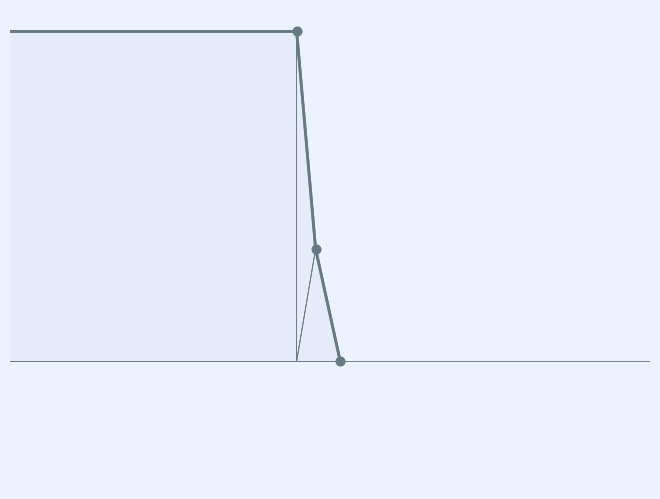

In [21]:
refresh_yybar()
yybar_plt.plot()

In [22]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0   3.78788e-10
 1:       3.7879    -0.0757576
 2:       1.2879         -0.05
 3:            0         -0.05

       pr_ray_ht    pr_ray_slp
 0:     -6.6e+07        0.0066
 1:            0        0.0066
 2:       0.2178      0.010956
 3:          0.5      0.010956

            power           tau        index    type
 0:             0         1e+10      1.00000    transmit
 1:          0.02            33     -1.00000    reflect
 2:         -0.02        25.758      1.00000    reflect
 3:             0             0      1.00000    transmit


In [24]:
pm.first_order_data()

efl               75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                  50
f/#                  10
m            -7.576e-09
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist          25.76
img_ht              0.5
exp_dist         -19.88
exp_radius        2.282
na img         -0.04994
n img                 1
optical invariant        0.025


In [25]:
vertex=2
pm.apply_ht_dgm_data(vertex, (0.2178/1.5, 2.25/1.5))
pm.paraxial_lens_to_seq_model()

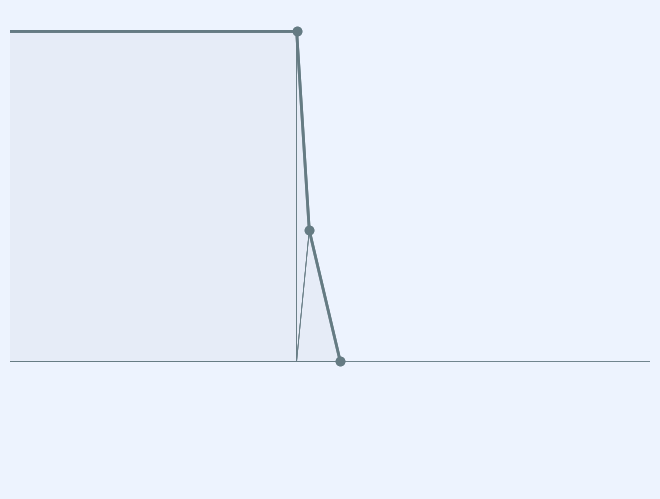

In [26]:
refresh_yybar()
yybar_plt.plot()

In [27]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0   3.78788e-10
 1:       3.7879     -0.103994
 2:          1.5         -0.05
 3:   2.2204e-16         -0.05

       pr_ray_ht    pr_ray_slp
 0:     -6.6e+07        0.0066
 1:            0        0.0066
 2:       0.1452     0.0118267
 3:          0.5     0.0118267

            power           tau        index    type
 0:             0         1e+10      1.00000    transmit
 1:    0.02745455            22     -1.00000    reflect
 2:   -0.03599633            30      1.00000    reflect
 3:             0             0      1.00000    transmit


In [28]:
pm.first_order_data()

efl               75.76
ffl              -135.8
pp1              -59.99
bfl                  30
ppk               45.76
f/#                  10
m            -7.576e-09
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img         -0.04994
n img                 1
optical invariant        0.025


In [29]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1  6.6000e+07
  M1:    -0.013727     -22.0000       air    reflect -1      3.7885
  M2:    -0.017998      30.0000       air    reflect  1      1.6444
 Img:     0.000000      0.00000             transmit  1     0.50860


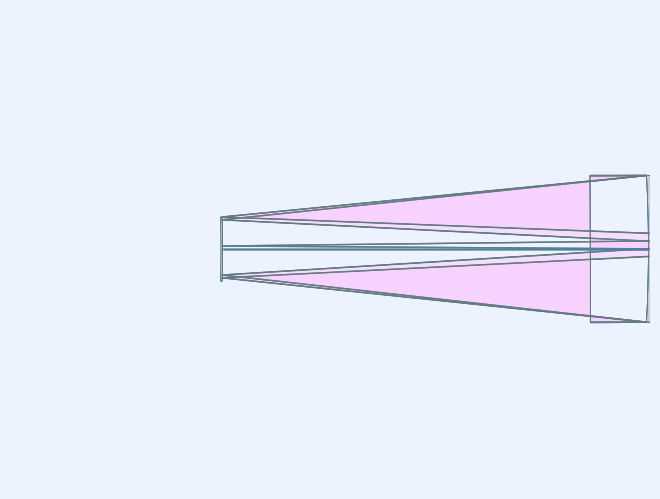

In [30]:
layout_plt.refresh()

In [31]:
opm.save_model('TwoMirror')

# Spherical Two Mirror

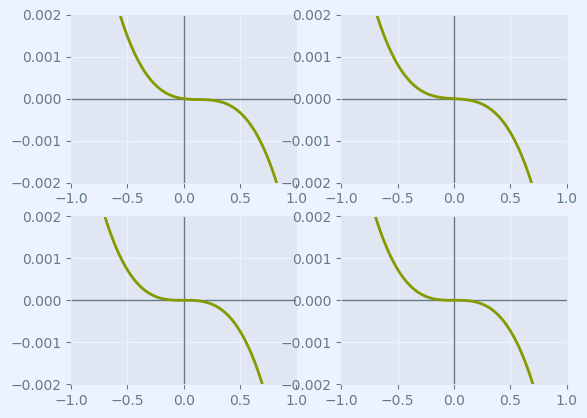

In [32]:
abr_plt.refresh()

In [33]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [34]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Dall-Kirkham Two Mirror

In [35]:
apply_conics(opm, tcm.dall_kirkham, pm)

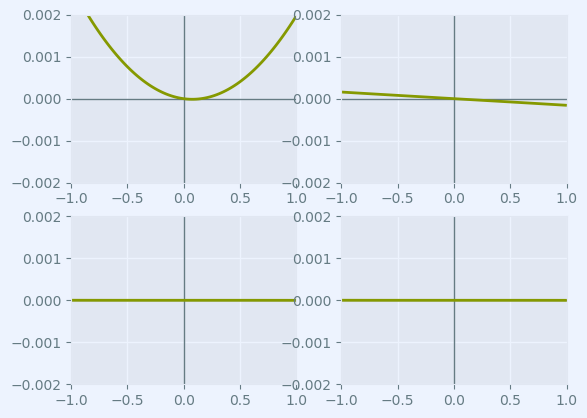

In [36]:
abr_plt.refresh()

In [37]:
opm.save_model('Dall_Kirkham')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-0.5491583810039262), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=0.0), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [38]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [39]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Cassegrain Two Mirror

In [40]:
apply_conics(opm, tcm.cassegrain, pm)

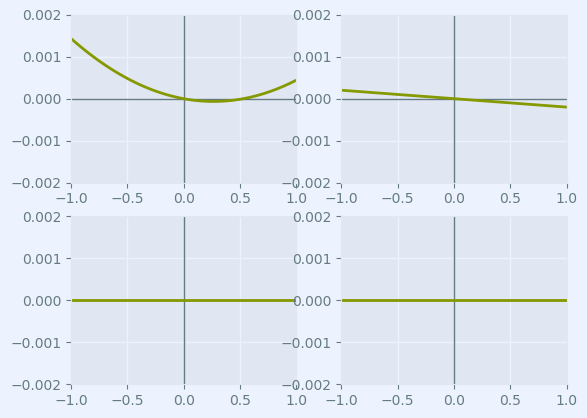

In [41]:
abr_plt.refresh()

In [42]:
opm.save_model('Cassegrain')
sm.list_surfaces()
sm.list_model()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-1.0), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=-8.134136650232055), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)
             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1  6.6000e+07
  M1:    -0.013727     -22.0000       air    reflect -1      3.7885
  M2:    -0.017998      30.0000       air    reflect  1      1.6474
 Img:     0.000000      0.00000             transmit  1     0.50145


In [43]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [44]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Ritchey-Chretien Two Mirror

In [45]:
apply_conics(opm, tcm.ritchey_chretien, pm)

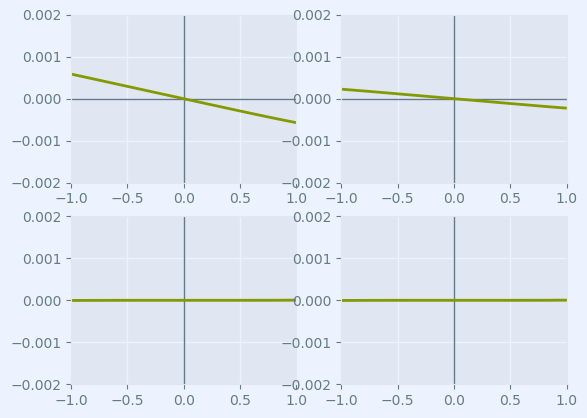

In [46]:
abr_plt.refresh()

In [47]:
opm.save_model('Ritchey_Chretien')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-1.303115101278525), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=-13.602974376524408), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [48]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

out = widgets.Output()
with out:
    display(to_df)
    display(wv_df)
    display(fcv)
display(out)

Output()

In [49]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
wv_df.loc[:, 'W040':'W131']

,W040,W131
1,2.420552e-01,-0.122896
1.asp,-3.154258e-01,-0.000000
2,-1.091286e-01,0.052232
2.asp,1.824991e-01,0.070664
sum,-4.328364e-09,0.000000


In [51]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.loc[:, 'W040':'W131'].plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Revert to Two Spherical Mirrors

In [52]:
apply_conics(opm, tcm.spheres, pm)
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=0.0), interact_mode=reflect)
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=0.0), interact_mode=reflect)
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [53]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0  3.78788e-10  3.78788e-10     -6.6e+07       0.0066       0.0066
 1      3.78788     0.103994   -0.0519972            0      -0.0066       0.0066
 2          1.5        -0.05   -0.0769972       0.1452    0.0118267   0.00921333
 3  2.22045e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [54]:
from rayoptics.elem.profiles import mutate_profile

sm.ifcs[1].profile = mutate_profile(sm.ifcs[1].profile, 'Spherical')
sm.ifcs[2].profile = mutate_profile(sm.ifcs[2].profile, 'Spherical')

In [55]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air   transmit  1  6.6000e+07
  M1:    -0.013727     -22.0000       air    reflect -1      3.7885
  M2:    -0.017998      30.0000       air    reflect  1      1.6444
 Img:     0.000000      0.00000             transmit  1     0.50860


In [56]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0  3.78788e-10  3.78788e-10     -6.6e+07       0.0066       0.0066
 1      3.78788     0.103994   -0.0519972            0      -0.0066       0.0066
 2          1.5        -0.05   -0.0769972       0.1452    0.0118267   0.00921333
 3  2.22045e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [57]:
opm.save_model('TwoSphericalMirror')

In [58]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0   3.78788e-10
 1:       3.7879     -0.103994
 2:          1.5         -0.05
 3:   2.2204e-16         -0.05

       pr_ray_ht    pr_ray_slp
 0:     -6.6e+07        0.0066
 1:            0        0.0066
 2:       0.1452     0.0118267
 3:          0.5     0.0118267

            power           tau        index    type
 0:             0         1e+10      1.00000    transmit
 1:    0.02745455            22     -1.00000    reflect
 2:   -0.03599633            30      1.00000    reflect
 3:             0             0      1.00000    transmit


In [59]:
pm.first_order_data()

efl               75.76
ffl              -135.8
pp1              -59.99
bfl                  30
ppk               45.76
f/#                  10
m            -7.576e-09
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img         -0.04994
n img                 1
optical invariant        0.025
